In [1]:
pip install bm3d

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from astropy.convolution import convolve
import scipy.stats
from tqdm import tqdm
from skimage.restoration import denoise_tv_bregman
from numpy.linalg import norm
import scipy
import bm3d

C:\Users\Drira Yosr\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Drira Yosr\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Drira Yosr\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Ouverture des fichiers 


In [7]:
filename_out = "S1A_IW_SLC__1SDV_20170103T015004_20170103T015030_014661_017D92_6421_Orb_Stack(2).tif"

image = tifffile.imread(filename_out)

image_1 = image[0,:,:] + 1j*image[1,:,:]

image_2 = image[2,:,:] + 1j*image[3,:,:]

image_3 = image[2,:,:] + 1j*image[3,:,:]

# Spécification de la zone de pixel

In [8]:
sy2 = np.s_[850:1100] 
sx2 = np.s_[15400:15900]
img1 = image_1[sy2, sx2]

In [10]:
img2 = image_2[sy2, sx2]

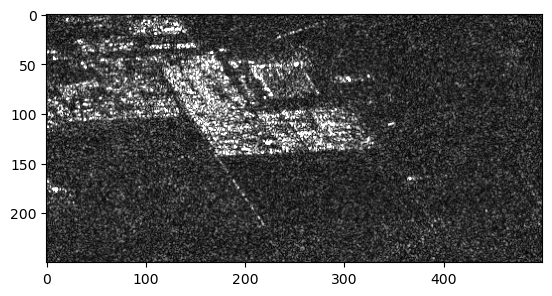

In [11]:
plt.imshow(np.abs(img2),cmap="gray",vmax= 1/5* np.max(np.abs(img2)))
plt.show()

# Forming the ratio image

In [12]:
reference_image = img1
def ratio(img, reference_img):
    # Ajoutez une petite valeur à reference_img pour éviter la division par zéro
    for i in range (np.shape(reference_img)[0]):
        for j in range (np.shape(reference_img)[1]):
             if reference_img[i, j] == 0.+0.j:
                    reference_img[i, j] = 1e-3+0.j               
    return np.clip(img / reference_image, 1e-3, 10)

ratio_img = ratio (img2, reference_image) 
ratio_real = np.real(ratio_img)

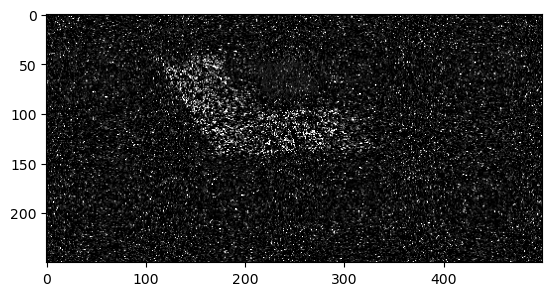

In [14]:
#affichage de l'image ratio: 
plt.imshow(np.abs(ratio_img),cmap="gray",vmax= 1/10* np.max(np.abs(ratio_img)))
plt.show()

# Seuillage

In [28]:
def seuillage(image_gris, seuil):
    _, image_bw = cv2.threshold(image_gris, seuil, 255, cv2.THRESH_BINARY)
    return image_bw

# Charger l'image en niveaux de gris
image_gris = image_denoised

# Spécifier le seuil (ajustez cette valeur en fonction de vos besoins)
seuil =1

# Appliquer le seuillage
image_bw = seuillage(image_gris, seuil)

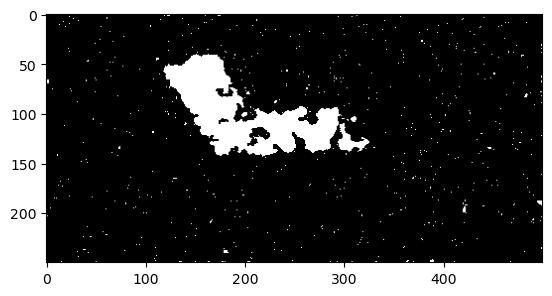

In [29]:
#affichage de l'image en noir et blanc: 
plt.imshow(image_bw,cmap="gray",vmax= 1* np.max(image_bw))
plt.show()